In [16]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [17]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Binary target (0 = Benign, 1 = Malignant)

In [18]:
# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Define the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer 1
    Dense(32, activation='relu'),                                   # Hidden layer 2
    Dense(1, activation='sigmoid')                                 # Output layer
])

In [21]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy:.2f}")

# Generate classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


Epoch 1/50
12/12 [==============================] - 1s 11ms/step - loss: 0.6527 - accuracy: 0.5962 - val_loss: 0.5053 - val_accuracy: 0.9121
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.4393 - accuracy: 0.8901 - val_loss: 0.3501 - val_accuracy: 0.9231
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.2990 - accuracy: 0.9368 - val_loss: 0.2401 - val_accuracy: 0.9451
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 0.2062 - accuracy: 0.9505 - val_loss: 0.1762 - val_accuracy: 0.9451
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 0.1542 - accuracy: 0.9643 - val_loss: 0.1439 - val_accuracy: 0.9560
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.1238 - accuracy: 0.9698 - val_loss: 0.1268 - val_accuracy: 0.9560
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 0.1036 - accuracy: 0.9725 - val_loss: 0.1159 - val_accuracy: 0.9780
Epoch 8/50
12/12 [=

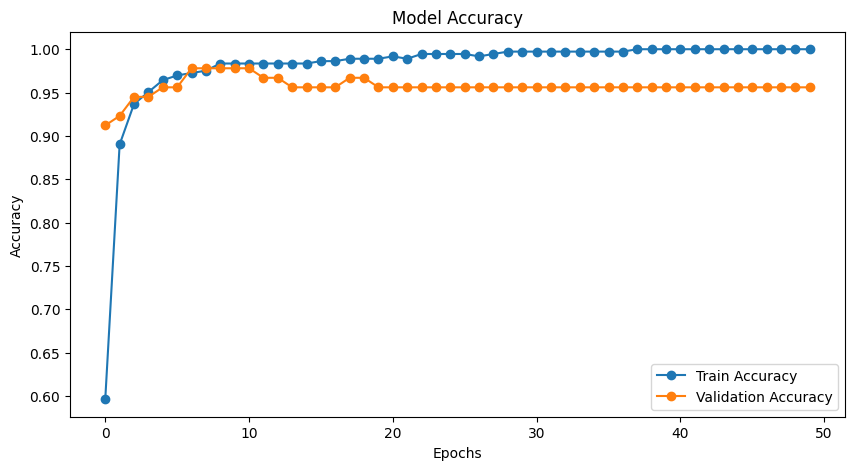

In [22]:

# Visualize training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()